# **LINEAR REGRESSION**

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(rc = {'figure.figsize':(8,8)})

In [2]:
data = [
        (10, 95),
        (9, 80),
        (2, 10),
        (15, 50),
        (10, 45),
        (16, 98),
        (11, 38),
        (16, 93),
]

In [3]:
x = [pt[0] for pt in data]
y = [pt[1] for pt in data]

## **ORIGINAL PLOT**

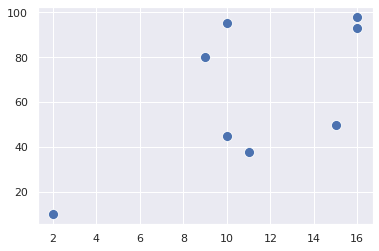

In [7]:
sns.scatterplot(x=x, y=y, s=100)

## **LINE PARAMETER GENERATION**

In [8]:
n = len(x)
xx = [a * a for a in x]
xy = [x[i] * y[i] for i in range(n)]

In [9]:
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xx = np.sum(xx)
sum_xy = np.sum(xy)

In [10]:
m = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x * sum_x)

In [11]:
b = (sum_y - m * sum_x) / n

In [14]:
print(f'LINE EQUATION: y = {round(m,2)} * x + {round(b,2)}')

LINE EQUATION: y = 4.59 * x + 12.58


## **PLOT WITH GIVEN LINE**

In [19]:
def plot_graph(x, y, slope, intercept):
    axes = sns.scatterplot(x=x, y=y, s=100)
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color='red')

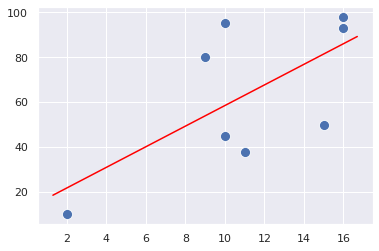

In [20]:
plot_graph(x, y, m, b)

# **SDES IMPLEMENTATION**

## **KEY GENERATION**

In [ ]:
P10 = [3, 5, 2, 7, 4, 10, 1, 9, 8, 6]
P8 = [6, 3, 7, 4, 8, 5, 10, 9]

In [ ]:
def apply_permutation(x, p):
  res = []
  for i in p:
    res.append(x[i-1])
  return res

In [ ]:
def left_shift(x, places = 1):
  places %= len(x)
  return x[places:] + x[:places]

In [ ]:
# key = [1, 0, 1, 0, 0, 0, 0, 0, 1, 0]
key = [1, 1, 0, 0, 0, 1, 1, 1, 1, 0]

In [ ]:
key_p10 = apply_permutation(key, P10)
print(f'Key after P10 permutation: {key_p10}')

Key after P10 permutation: [0, 0, 1, 1, 0, 0, 1, 1, 1, 1]


In [ ]:
l = key_p10[:5]
r = key_p10[5:]
print(f'Left half: {l}, Right half: {r}')

Left half: [0, 0, 1, 1, 0], Right half: [0, 1, 1, 1, 1]


In [ ]:
l_ls1 = left_shift(l)
r_ls1 = left_shift(r)
print('Applying left shift')
print(f'Left half: {l_ls1}, Right half: {r_ls1}')

Applying left shift
Left half: [0, 1, 1, 0, 0], Right half: [1, 1, 1, 1, 0]


In [ ]:
key_ls1 = l_ls1 + r_ls1
k1 = apply_permutation(key_ls1, P8)
print(f'Key-1 after applying P8 permutation: {k1}')

Key-1 after applying P8 permutation: [1, 1, 1, 0, 1, 0, 0, 1]


In [ ]:
l_ls2 = left_shift(l_ls1, 2)
r_ls2 = left_shift(r_ls1, 2)
print('Applying double left shift')
print(f'Left half: {l_ls2}, Right half: {r_ls2}')

Applying double left shift
Left half: [1, 0, 0, 0, 1], Right half: [1, 1, 0, 1, 1]


In [ ]:
key_ls2 = l_ls2 + r_ls2
k2 = apply_permutation(key_ls2, P8)
print(f'Key-2 after applying P8 permutation: {k2}')

Key-2 after applying P8 permutation: [1, 0, 1, 0, 0, 1, 1, 1]


In [ ]:
print('Final keys obtained')
print(f'Key-1: {k1}')
print(f'Key-2: {k2}')

Final keys obtained
Key-1: [1, 1, 1, 0, 1, 0, 0, 1]
Key-2: [1, 0, 1, 0, 0, 1, 1, 1]


## **ENCRYPTION AND DECRYPTION PREVIOUS APPROACH**

In [ ]:
# plain_text = [1, 0, 0, 1, 0, 1, 1, 1]
plain_text = [0, 0, 1, 0, 1, 0, 0, 0]

In [ ]:
initial_permutation = [2, 6, 3, 1, 4, 8, 5, 7]
expansion_permutation = [4, 1, 2, 3, 2, 3, 4, 1]
P4 = [2, 4, 3, 1]
inv_initial_permutation = [4, 1, 3, 5, 7, 2, 8, 6]

In [ ]:
text_ip = apply_permutation(plain_text, initial_permutation)
print(f'Text after initial permutation: {text_ip}')

Text after initial permutation: [0, 0, 1, 0, 0, 0, 1, 0]


In [ ]:
l_ip = text_ip[:4]
r_ip = text_ip[4:]
r_ip_ep = apply_permutation(r_ip, expansion_permutation)
print(f'Right half after explansion: {r_ip_ep}')

Right half after explansion: [0, 0, 0, 1, 0, 1, 0, 0]


In [ ]:
def apply_xor(x, y):
  res = []
  for i in range(len(x)):
    res.append(x[i] ^ y[i])
  return res

In [ ]:
k1_xor = apply_xor(k1, r_ip_ep)
print(f'Key-1 after XOR: {k1_xor}')

Key-1 after XOR: [1, 1, 1, 1, 1, 1, 0, 1]


In [ ]:
l_xor = k1_xor[:4]
r_xor = k1_xor[4:]

In [ ]:
S0 = [[1,0,3,2],
      [3,2,1,0],
      [0,2,1,3],
      [3,1,3,2]]

S1=  [[0,1,2,3],
      [2,0,1,3],
      [3,0,1,0],
      [2,1,0,3]]

In [ ]:
def apply_s_box(x, s):
  r = int(f'{x[0]}{x[3]}', 2)
  c = int(f'{x[1]}{x[2]}', 2)
  val = s[r][c]

  if val == 0: return [0, 0]
  elif val == 1: return [0, 1]
  elif val == 2: return [1, 0]
  else: return [1, 1]

In [ ]:
s_box_1 = apply_s_box(l_xor, S0) + apply_s_box(r_xor, S1)
print(f'Applying S-Boxes on XOR key: {s_box_1}')

Applying S-Boxes on XOR key: [1, 0, 0, 0]


In [ ]:
s_box_p4 = apply_permutation(s_box_1, P4)
print(f'After applying P4: {s_box_p4}')

After applying P4: [0, 0, 0, 1]


In [ ]:
p4_xor = apply_xor(l_ip, s_box_p4)
print(f'Applying XOR with left half: {p4_xor}')

Applying XOR with left half: [0, 0, 1, 1]


In [ ]:
x = p4_xor + r_ip
print(f'Combining with right half: {x}')

Combining with right half: [0, 0, 1, 1, 0, 0, 1, 0]


In [ ]:
x_rev = x[4:] + x[:4]
print(f'Swapping nibbles: {x_rev}')

Swapping nibbles: [0, 0, 1, 0, 0, 0, 1, 1]


In [ ]:
l_x = x_rev[:4]
r_x = x_rev[4:]
r_x_ep = apply_permutation(r_x, expansion_permutation)
print(f'Right half after expansion: {r_x_ep}')

Right half after expansion: [1, 0, 0, 1, 0, 1, 1, 0]


In [ ]:
k2_xor = apply_xor(r_x_ep, k2)
print(f'After XOR with Key-2: {k2_xor}')

After XOR with Key-2: [0, 0, 1, 1, 0, 0, 0, 1]


In [ ]:
l_xor_2 = k2_xor[:4]
r_xor_2 = k2_xor[4:]

In [ ]:
s_box_2 = apply_s_box(l_xor_2, S0) + apply_s_box(r_xor_2, S1)
print(f'Applying S-Boxes on XOR key: {s_box_2}')

Applying S-Boxes on XOR key: [1, 0, 1, 0]


In [ ]:
s_box_2_p4 = apply_permutation(s_box_2, P4)
print(f'After applying P4: {s_box_2_p4}')

After applying P4: [0, 0, 1, 1]


In [ ]:
y = apply_xor(l_x, s_box_2_p4) + r_x
print(f'After XOR and joining: {y}')

After XOR and joining: [0, 0, 0, 1, 0, 0, 1, 1]


In [ ]:
l_y = y[:4]
r_y = y[4:]

In [ ]:
r_y_ep = apply_permutation(r_y, expansion_permutation)
print(f'Right half after expansion: {r_y_ep}')

Right half after expansion: [1, 0, 0, 1, 0, 1, 1, 0]


In [ ]:
r_y_xor = apply_xor(r_y_ep, k2)
print(f'After XOR with Key-2: {r_y_xor}')

After XOR with Key-2: [0, 0, 1, 1, 0, 0, 0, 1]


In [ ]:
xor_l = r_y_xor[:4]
xor_r = r_y_xor[4:]

In [ ]:
s_box_3 = apply_s_box(xor_l, S0) + apply_s_box(xor_r, S1)
print(f'Applying S-Boxes on XOR key: {s_box_3}')

Applying S-Boxes on XOR key: [1, 0, 1, 0]


In [ ]:
s_box_3_p4 = apply_permutation(s_box_3, P4)
print(f'After applying P4: {s_box_3_p4}')

After applying P4: [0, 0, 1, 1]


In [ ]:
z = apply_xor(l_x, s_box_3_p4) + r_x
print(f'After XOR and joining: {z}')

After XOR and joining: [0, 0, 0, 1, 0, 0, 1, 1]


In [ ]:
cipher_text = apply_permutation(z, inv_initial_permutation)
print(f'Cipher Text: {cipher_text}')

Cipher Text: [1, 0, 0, 0, 1, 0, 1, 0]


## **ENCRYPTION AND DECRYPTION NEW APPROACH**

In [ ]:
IP = [2, 6, 3, 1, 4, 8, 5, 7]
EP = [4, 1, 2, 3, 2, 3, 4, 1]
P4 = [2, 4, 3, 1]
IP_inv = [4, 1, 3, 5, 7, 2, 8, 6]

In [ ]:
def apply_xor(x, y):
  res = []
  for i in range(len(x)):
    res.append(x[i] ^ y[i])
  return res

In [ ]:
S0 = [[1,0,3,2],
      [3,2,1,0],
      [0,2,1,3],
      [3,1,3,2]]

S1=  [[0,1,2,3],
      [2,0,1,3],
      [3,0,1,0],
      [2,1,0,3]]

def apply_s_box(x, s):
  r = int(f'{x[0]}{x[3]}', 2)
  c = int(f'{x[1]}{x[2]}', 2)
  val = s[r][c]

  if val == 0: return [0, 0]
  elif val == 1: return [0, 1]
  elif val == 2: return [1, 0]
  else: return [1, 1]

In [ ]:
def split_halves(x):
  n = len(x) // 2
  return x[:n], x[n:]

In [ ]:
def perform_round(text, key, swap):
  l, r = split_halves(text)
  r_new = apply_permutation(r, EP)
  r_new = apply_xor(r_new, key)
  rl, rr = split_halves(r_new)
  r_new = apply_s_box(rl, S0) + apply_s_box(rr, S1)
  r_new = apply_permutation(r_new, P4)
  r_new = apply_xor(l, r_new)
  return r + r_new if swap else r_new + r

In [ ]:
plain_text = [0, 0, 1, 0, 1, 0, 0, 0]
# plain_text = [1, 0, 0, 1, 0, 1, 1, 1]

In [ ]:
text = apply_permutation(plain_text, IP)
print(text)
text = perform_round(text, k1, True)
print(text)
text = perform_round(text, k2, False)
print(text)
cipher_text = apply_permutation(text, IP_inv)

[0, 0, 1, 0, 0, 0, 1, 0]
[0, 0, 1, 0, 0, 0, 1, 1]
[0, 0, 0, 1, 0, 0, 1, 1]


In [ ]:
cipher_text

[1, 0, 0, 0, 1, 0, 1, 0]

# **DECISION TREE**

In [ ]:
import pandas as pd
import numpy as np
from itertools import chain, combinations

## **PREVIOUS APPROACH**

In [ ]:
class Node:
  def __init__(self, col, dtype, values = None):
    self.col = col
    self.dtype = dtype
    if self.dtype == 'categorical':
      assert values is not None, 'Mention values for categorical feature.'
      self.values = values
    else: self.values = None
    self.yes = True
    self.no = False
  
  def __str__(self):
    return f'COLUMN: {self.col}, VALUES: {self.values},'

In [ ]:
class DecisionTree:
  def __init__(self):
    self.tree = None

  def __gini(self, cnt):
    total = np.sum(cnt)
    if total == 0: return 0
    return 1 - (cnt[0] / total) ** 2 - (cnt[1] / total) **2

  def __powerset(self, iterable):
    s = list(iterable)
    if len(s) == 1: return [tuple(s)]
    return list(chain.from_iterable(combinations(s, r) for r in range(len(s)+1)))[1:-1]

  def __total_imp(self, true_count, false_count):
    true_total = np.sum(true_count)
    false_total = np.sum(false_count)
    total = true_total + false_total
    return (self.__gini(true_count) * true_total / total + self.__gini(false_count) * false_total / total,
            self.__gini(true_count), self.__gini(false_count))

  def __get_imp(self, feature, val, data, label_name):
    if self.col_type[feature] == 'numerical':
      pass
    else:
      true_count = [0, 0]
      false_count = [0, 0]
      for i in range(len(data[feature])):
        if data[feature].iloc[i] in val:
          if data[label_name].iloc[i]: true_count[1] += 1
          else: true_count[0] += 1
        else:
          if data[label_name].iloc[i]: false_count[1] += 1
          else: false_count[0] += 1
      return self.__total_imp(true_count, false_count)
  
  def __feature_impurity(self, feature, data, label_name):
    if self.col_type[feature] == 'numerical':
      pass
    else:
      values = self.__powerset(data[feature].unique())
      val_imp = set()
      for val in values:
        imp = self.__get_imp(feature, val, data, label_name)
        val_imp.add((imp, val))
        # print(f'Feature: {feature}, Values: {val}, Impurity: {imp[0]}')
      return val_imp.pop()

  def __build_tree(self, data, label_name, cols, par_imp = 10):
    if len(cols) == 1: return None
    col_imp = set()
    for col in cols:
      if self.col_type[col] == 'label': continue
      col_imp.add((self.__feature_impurity(col, data, label_name), col))
    best = col_imp.pop()
    col = best[1]
    if best[0][0][0] < par_imp:
      node = Node(col, self.col_type[col], best[0][1])
      data_yes = data[data[col].isin(list(best[0][1])) == True].drop(col, axis=1)
      data_no = data[data[col].isin(list(best[0][1])) == False].drop(col, axis=1)
      new_cols = list(data_yes.columns)
      node.yes = self.__build_tree(data_yes, label_name, new_cols.copy(), best[0][0][1])
      node.no = self.__build_tree(data_no, label_name, new_cols.copy(), best[0][0][2])
      if node.yes is None: node.yes = True
      if node.no is None: node.no = False
      return node

  def fit(self, df, label_name):
    self.col_type = {}
    self.cols = list(df.columns)
    for col in self.cols:
      if col == label_name: self.col_type[col] = 'label'
      elif type(df[col][0]) == str:
        self.col_type[col] = 'categorical'
      else: self.col_type[col] = 'numerical'
    self.tree = self.__build_tree(df, label_name, self.cols.copy())

  def __predict(self, data, node):
    if type(node) == bool: return node
    
    val = data[node.col]
    if val in node.values: node = node.yes
    else: node = node.no
    
    return self.__predict(data, node)

  def predict(self, df):
    preds = []
    for i in range(len(df)):
      preds.append(self.__predict(df.iloc[i], self.tree))
    return preds

In [ ]:
df = pd.read_csv('dataset.csv').drop('ID', axis=1)
df.head()

,Age,Income,Gender,MaritalStatus,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes


In [ ]:
train_df = df[:-1].copy()
train_df['Buys'] = train_df['Buys'] == 'Yes'

In [ ]:
test_df = df.drop('Buys', axis = 1)

In [ ]:
clf = DecisionTree()

In [ ]:
clf.fit(train_df, 'Buys')

In [ ]:
print(f'Root: {clf.tree.col}')

Root: Gender


## **NEW APPROACH**

In [ ]:
class Node:
  def __init__(self, feature, values):
    self.feature = feature
    self.values = values
    self.yes = None
    self.no = None

  def __str__(self):
    return f'Feature: {self.feature}, Values: {self.values}'

class DecisionTree:
  def __gini(self, yes_count, no_count):
    yes_total = yes_count[0] + yes_count[1]
    no_total = no_count[0] + no_count[1]
    try:
      gini_yes = 1 - (yes_count[0] / yes_total) ** 2 - (yes_count[1] / yes_total) ** 2
    except: gini_yes = 0
    try:
      gini_no = 1 - (no_count[0] / no_total) ** 2 - (no_count[1] / no_total) ** 2
    except: gini_no = 0
    return (yes_total * gini_yes  + no_total * gini_no) / (yes_total + no_total)
  
  def __get_impurity(self, X, y, values):
    yes_count = [0, 0]
    no_count = [0, 0]
    for i in range(len(X)):
      if X[i] in values:
        if y[i]: yes_count[1] += 1
        else: yes_count[0] += 1
      else:
        if y[i]: no_count[1] += 1
        else: no_count[0] += 1
    return self.__gini(yes_count, no_count)

  def __parse(self, x):
    val = list(bin(x)[2:])
    return [i for i in range(len(val)) if val[i] == '1']

  def __get_feature_impurity(self, X, feature, y):
    values = self.unique_feature_values[feature]
    n = 2 ** len(values) - 1
    best_impurity = 100
    for i in range(1, n):
      idx = self.__parse(i)
      val_subset = values[idx].copy()
      impurity = self.__get_impurity(X, y, val_subset)
      if impurity < best_impurity:
        best_impurity = impurity
        best_values = val_subset    
    return best_values, best_impurity
  
  def __select_best_feature(self, X, y):
    best_impurity = 100
    for feature in X.columns:
      values, impurity = self.__get_feature_impurity(list(X[feature]), feature, y)
      if impurity < best_impurity:
        best_impurity = impurity
        best_feature = feature
        best_values = values

    return best_feature, best_values, best_impurity

  def __filter_data(self, X, y, feature, values, flag):
    X_filtered = X[X[feature].isin(values) == flag].copy()
    idx = list(X_filtered.index)
    X_filtered = X_filtered.reset_index().drop([feature, 'index'], axis = 1)
    y_filtered = y[idx].copy()
    return X_filtered, y_filtered
  
  def __build_tree(self, X, y, parent_impurity = 100):
    if len(X.columns) == 0: return None
    best_feature, best_values, impurity = self.__select_best_feature(X, y)
    if impurity >= parent_impurity: return None
    node = Node(best_feature, best_values)
    
    X_yes, y_yes = self.__filter_data(X, y, best_feature, best_values, True)
    X_no, y_no = self.__filter_data(X, y, best_feature, best_values, False)
    
    node.yes = self.__build_tree(X_yes, y_yes, impurity)
    node.no = self.__build_tree(X_no, y_no, impurity)

    if node.yes is None: node.yes = True
    if node.no is None: node.no = False
    return node

  def __set_feature_values(self, X):
    self.unique_feature_values = {}
    for feature in X.columns:
      self.unique_feature_values[feature] = np.unique(list(X[feature]))

  def fit(self, X, y):
    self.__set_feature_values(X)
    self.tree = self.__build_tree(X, y)

  def __make_prediction(self, x, node):
    if type(node) == bool: return node
    
    value = x[node.feature]
    if value in node.values: node = node.yes
    else: node = node.no
    
    return self.__make_prediction(x, node)

  def predict(self, X):
    preds = []
    for i in range(len(X)):
      preds.append(self.__make_prediction(X.iloc[i], self.tree))
    return np.array(preds)

In [ ]:
df = pd.read_csv('dataset.csv').drop('ID', axis=1)
df.head()

,Age,Income,Gender,MaritalStatus,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes


In [ ]:
train_df = df.iloc[:-1].copy()
test_df = df.iloc[-1:].copy()

In [ ]:
X_train, y_train = train_df.drop('Buys', axis = 1), np.array(train_df['Buys']) == 'Yes'

In [ ]:
X_test = df.drop('Buys', axis = 1)

In [ ]:
clf = DecisionTree()

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
clf.predict(X_test)

array([ True, False, False,  True, False, False, False,  True, False,
        True, False,  True, False,  True, False])

In [ ]:
print(f'Root: {clf.tree.no.feature}, Values: {clf.tree.no.values}')

Root: Gender, Values: ['21-35']


# **SAES IMPLEMENTATION**

In [ ]:
import numpy as np

In [ ]:
def nibble_to_hex(n):
  assert len(n) <= 4, 'Invalid nibble provided.'
  if len(n) < 4: n = (4-len(n))*'0' + n
  return hex(int(n, 2))[2:]

In [ ]:
def hex_to_nibble(h):
  assert len(h) == 1, 'Invalid hex digit.'
  n = bin(int(h,16))[2:]
  return (4-len(n))*'0' + n

In [ ]:
def block_to_state(b):
  return [
          [b[0], b[2]],
          [b[1], b[3]]
  ]

In [ ]:
def state_to_block(s):
  return [s[0][0], s[1][0], s[0][1], s[1][1]]

In [ ]:
def sub_nibbles(s):
  S = [
       ['9', '4', 'a', 'b'],
       ['d', '1', '8', '5'],
       ['6', '2', '0', '3'],
       ['c', 'e', 'f', '7']
  ]
  b = state_to_block(s)
  b_new = []
  for h in b:
    n = hex_to_nibble(h)
    n_new = S[int(n[:2], 2)][int(n[2:], 2)]
    b_new.append(n_new)
  return block_to_state(b_new)

In [ ]:
def shift_rows(s):
  return [
          [s[0][0], s[0][1]],
          [s[1][1], s[1][0]]
  ]

In [ ]:
def mul(x, y):
  p1 = [int(c) for c in hex_to_nibble(x)]
  p2 = [int(c) for c in hex_to_nibble(y)]
  return np.polymul(p1, p2)

def add(x, y):
  p = list(np.polyadd(x, y))
  p = [c%2 for c in p]
  _, r = np.polydiv(p, [1, 0, 0, 1, 1])
  r = [str(int(c%2)) for c in r]
  return nibble_to_hex(''.join(r))

def mix_columns(s):
  C = [
       ['1', '4'],
       ['4', '1']
  ]
  s_new = [
           [None, None],
           [None, None]
  ]
  for i in range(2):
    for j in range(2):
      s_new[i][j] = add(mul(C[i][0], s[0][j]), mul(C[i][1], s[1][j]))
  return s_new

In [ ]:
def rot_word(w):
  return [w[1], w[0]]

def sub_word(w):
  S = [
       ['9', '4', 'a', 'b'],
       ['d', '1', '8', '5'],
       ['6', '2', '0', '3'],
       ['c', 'e', 'f', '7']
  ]
  w_new = []
  for h in w:
    n = hex_to_nibble(h)
    n_new = S[int(n[:2], 2)][int(n[2:], 2)]
    w_new.append(n_new)
  return w_new

def xor(w1, w2):
  w = []
  for i in range(2):
    x = int(hex_to_nibble(w1[i]), 2)
    y = int(hex_to_nibble(w2[i]), 2)
    w.append(nibble_to_hex(bin(x^y)[2:]))
  return w

def key_expansion(k):
  w0, w1 = k[:2], k[2:]
  r1 = ['8', '0']
  t2 = xor(sub_word(rot_word(w1)), r1)
  w2 = xor(w0, t2)
  w3 = xor(w1, w2)
  r2 = ['3', '0']
  t4 = xor(sub_word(rot_word(w3)), r2)
  w4 = xor(w2, t4)
  w5 = xor(w3, w4)
  return w0 + w1, w2 + w3, w4 + w5

In [ ]:
def add_round_key(k, s):
  k_state = block_to_state(k)
  w1 = xor([k_state[0][0], k_state[1][0]], [s[0][0], s[1][0]])
  w2 = xor([k_state[0][1], k_state[1][1]], [s[0][1], s[1][1]])
  return [
          [w1[0], w2[0]],
          [w1[1], w2[1]]
  ]

In [ ]:
def encrypt(plaintext, k):
  k1, k2, k3 = key_expansion(k)
  state = block_to_state(plaintext)
  state = add_round_key(k1, state)
  
  ### ROUND 1
  state = sub_nibbles(state)
  state = shift_rows(state)
  state = mix_columns(state)
  state = add_round_key(k2, state)

  ### ROUND 2
  state = sub_nibbles(state)
  state = shift_rows(state)
  state = [
           ['6'. '4'],
           ['7', 'b']
  ]
  state = add_round_key(k3, state)
  
  ciphertext = state_to_block(state)
  return ciphertext

In [ ]:
plaintext = ['1', 'a', '2', '3']
key = ['2', '4', '7', '5']

In [ ]:
encrypt(plaintext, key)

[['8', 'd'], ['b', '7']]
[['8', 'd'], ['7', 'b']]
[['d', '4'], ['a', '2']]


['d', 'a', '4', '2']

# **k-NN**

In [34]:
import numpy as np

In [74]:
class kNN:
  def __init__(self, k):
    self.k = k
    self.X = []
    self.y = []

  def fit(self, X, y):
    self.X = self.X + X
    self.y = self.y + y

  def __distance(self, x, y):
    return (x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2

  def __get_class(self, X):
    distances = []
    for i in range(len(self.X)):
      distances.append((self.__distance(X, self.X[i]), self.y[i]))
    distances.sort()
    distances = distances[:self.k]
    counts = {}
    for d in distances:
      try: counts[d[1]] += 1
      except: counts[d[1]] = 1
    return max(counts, key = lambda i: counts[i])

  def predict(self, X):
    preds = []
    for x in X:
      preds.append(self.__get_class(x))
    return preds

  def __get_weighted_class(self, X):
    distances = []
    for i in range(len(self.X)):
      distances.append((self.__distance(X, self.X[i]), self.y[i]))
    distances.sort()
    distances = distances[:self.k]
#    print(distances)
    counts = {}
    for d in distances:
 #     print(d[0])
      try: counts[d[1]] += 1 / d[0]
      except: counts[d[1]] = 1 / d[0]
    return max(counts, key = lambda i: counts[i])

  def predict_weighted(self, X):
    preds = []
    for x in X:
      preds.append(self.__get_weighted_class(x))
    return preds

  def __get_locally_weighted_average_class(self, X):
    distances = []
    for i in range(len(self.X)):
      distances.append((self.__distance(X, self.X[i]), self.y[i]))
    distances.sort()
    distances = distances[:self.k]
    counts = {}
    print("....")
    for d in distances:
      try: counts[d[1]].append(1 / d[0])
      except: counts[d[1]] = [1 / d[0]]
    print(counts)
    for c in counts:
      counts[c] = np.mean(counts[c])
    return max(counts, key = lambda i: counts[i])

  def predict_locally_weighted_average(self, X):
    preds = []
    for x in X:
      preds.append(self.__get_locally_weighted_average_class(x))
    return preds

In [75]:
X = [
     (2, 4),
     (4, 6),
     (4, 4),
     (4, 2),
     (6, 4),
     (6 ,2)
]
y = ['Y', 'Y', 'B', 'Y', 'Y', 'B']

In [76]:
model = kNN(3)

In [77]:
model.fit(X, y)

In [78]:
print(f'Standard k-NN: {model.predict([(6, 6)])}')

Standard k-NN: ['Y']


In [79]:
print(f'Distance Weighted k-NN: {model.predict_weighted([(6, 6)])}')

Distance Weighted k-NN: ['Y']


In [80]:
print(f'Locally Weighted Average k-NN: {model.predict_locally_weighted_average([(6, 6)])}')

....
{'Y': [0.25, 0.25], 'B': [0.125]}
Locally Weighted Average k-NN: ['Y']


# **K-MEANS CLUSTERING**

In [81]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(7, 7)})

In [97]:
class KMeans:
  def __init__(self, k):
    self.k = k

  def __distance(self, x, y):
    return (x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2

  def fit(self, points, centroids):
    prev_clusters = None
    clusters = [set() for _ in range(self.k)]
    print(clusters)

    while prev_clusters != clusters:
      prev_clusters = clusters
      for p in points:
        idx = 0
        for i in range(1, self.k):
          if self.__distance(p, centroids[i]) < self.__distance(p, centroids[idx]):
            idx = i
        clusters[idx].add(p)
      for i in range(self.k):
        centroids[i] = np.mean(list(clusters[i]), axis = 0)
    print(clusters)
    return clusters, centroids

In [98]:
points = [
          (0.1, 0.6),
          (0.15, 0.71),
          (0.08,0.9),
          (0.16, 0.85),
          (0.2,0.3),
          (0.25,0.5),
          (0.24,0.1),
          (0.3,0.2)
]

## **BEFORE CLUSTERING**

In [99]:
raw_df = pd.DataFrame()
x = [p[0] for p in points]
y = [p[1] for p in points]
raw_df['x'] = x
raw_df['y'] = y
raw_df

,x,y
0,0.10,0.60
1,0.15,0.71
2,0.08,0.90
3,0.16,0.85
4,0.20,0.30
5,0.25,0.50
6,0.24,0.10
7,0.30,0.20


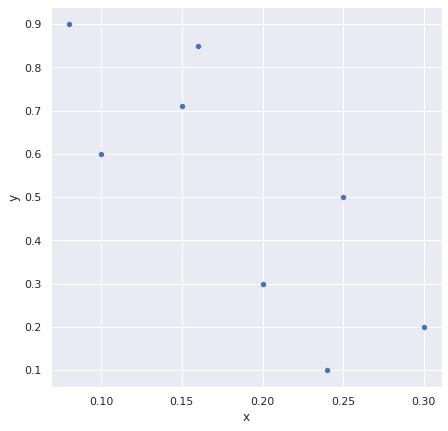

In [100]:
sns.scatterplot(data = raw_df, x = 'x', y = 'y')

## **AFTER CLUSTERING**

In [101]:
model = KMeans(2)

In [102]:
clusters, centroids = model.fit(points, centroids = [(0.1, 0.6),(0.3,0.2)])

[set(), set()]
[{(0.08, 0.9), (0.16, 0.85), (0.1, 0.6), (0.15, 0.71), (0.25, 0.5)}, {(0.2, 0.3), (0.24, 0.1), (0.3, 0.2)}]


In [103]:
print(centroids)

[array([0.148, 0.712]), array([0.24666667, 0.2       ])]


In [95]:
clustered_df = pd.DataFrame()
x = []
y = []
category = []
for i in range(len(clusters)):
  for p in clusters[i]:
    x.append(p[0])
    y.append(p[1])
    category.append(f'{i}')
for c in centroids:
  x.append(c[0])
  y.append(c[1])
  category.append('Centroid')
clustered_df['x'] = x
clustered_df['y'] = y
clustered_df['category'] = category
clustered_df

,x,y,category
0,0.080000,0.900,0
1,0.160000,0.850,0
2,0.100000,0.600,0
3,0.150000,0.710,0
4,0.250000,0.500,0
5,0.200000,0.300,1
6,0.240000,0.100,1
7,0.300000,0.200,1
8,0.148000,0.712,Centroid
9,0.246667,0.200,Centroid


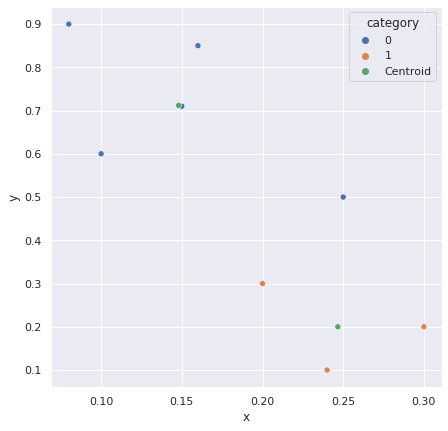

In [96]:
sns.scatterplot(data = clustered_df, x = 'x', y = 'y', hue = 'category')

# **DIFFIE-HELLMAN KEY EXCHANGE**

In [ ]:
### PUBLIC KEYS
P = 17
G = 27

In [ ]:
### PRIVATE KEYS
a = 13
b = 9

In [ ]:
### GENERATE KEYS
x = (G ** a) % P
y = (G ** b) % P
print(f'Generated Keys - x: {x}, y: {y}')

Generated Keys - x: 11, y: 7


In [ ]:
### GENERATE SECRET KEY WITH x AND y
key_a = (y ** a) % P
key_b = (x ** b) % P
print(f'Generated Secret Keys - KEY-A: {key_a}, KEY-B: {key_b}')

Generated Secret Keys - KEY-A: 6, KEY-B: 6


# **RSA**

In [ ]:
import numpy as np

In [ ]:
class RSA:
  def __init__(self):
    self.P = 53
    self.Q = 59
    self.n = self.P * self.Q
    self.phi = (self.P - 1) * (self.Q - 1)
    self.e = 3
    self.d = self.__generate_d()

  def __get_random_prime(self):
    primes = [3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
    return np.random.choice(primes)

  def __generate_e(self):
    for i in range(2, self.phi):
      if self.n % i != 0: return i
    return None

  def __generate_d(self):
    for k in range(1, self.phi):
      if (k * self.phi + 1) % self.e == 0:
        return (k * self.phi + 1) // self.e
    return None

  def get_public_key(self):
    return self.n, self.e

  def encrypt(self, plaintext):
    return (plaintext ** self.e) % self.n

  def decrypt(self, ciphertext):
    return (ciphertext ** self.d) % self.n

In [ ]:
enc = RSA()

In [ ]:
print(f'Public-Key: {enc.get_public_key()}')

Public-Key: (3127, 3)


In [ ]:
plaintext = 89
ciphertext = enc.encrypt(89)

In [ ]:
print(f'Encrypted value of {plaintext}: {ciphertext}')

Encrypted value of 89: 1394


In [ ]:
print(f'Decrypted value of {ciphertext}: {enc.decrypt(ciphertext)}')

Decrypted value of 1394: 89


# **ECC**

In [1]:
class ECC:
  def __init__(self, a, b, q, G):
    ### CURVE EQUATION = x ** 3 + a * x + b
    self.a = a
    self.b = b
    self.q = q
    self.G = G
    self.private_key = 5
    self.public_key = self.__generate_public_key()

  def __round(self, p):
    x, y = p
    if abs(x - int(x)) <= 0.0001: x = int(x)
    if abs(y - int(y)) <= 0.0001: y = int(y)
    return (x, y)
  
  def negate(self, p):
    return (p[0], -p[1])

  def add(self, p1, p2):
    if p1 == p2:
      x = ((3*p1[0]*p1[0] + self.a)/(2*p1[1]))**2 - 2*p1[0]
      y = -p1[1] + (3*p1[0]*p1[0] + self.a)/(2*p1[1]) * (p1[0] - x)
    else:
      x = ((p2[1]-p1[1])/(p2[0]-p1[0]))**2 - p1[0] - p2[0]
      y = -p1[1] + (p2[1]-p1[1])/(p2[0]-p1[0]) * (p1[0]-x)
    return self.__round((x, y))

  def sub(self, p1, p2):
    return self.add(p1, self.negate(p2))

  def dot(self, k, p):
    res = (p[0], p[1])
    for _ in range(k-1):
      res = self.add(res, p)
      res = self.negate(res)
    return res

  def __generate_public_key(self):
    return self.dot(self.private_key, self.G)

  def get_public_key(self):
    return self.public_key

  def generate_secret_key(self, public_key):
    self.secret_key = self.dot(self.private_key, public_key)

  def encrypt(self, message, public_key):
    k = 3
    return (self.dot(k, G), self.add(message, self.dot(k, public_key)))

  def decrypt(self, message):
    return self.sub(message[1], self.dot(self.private_key, message[0]))

In [2]:
a = 1
b = 6
q = 11
G = (5, 2)

In [3]:
ecc = ECC(a, b, q, G)

In [4]:
private_key = 8
public_key = ecc.dot(private_key, G)
print(f'PUBLIC-KEY: {public_key}')

PUBLIC-KEY: (351, 6576)


In [5]:
ecc.generate_secret_key(public_key)

In [6]:
secret_key = ecc.dot(private_key, ecc.get_public_key())
print(f'SECRET-KEY: {secret_key}')

SECRET-KEY: (351, 6576)


In [7]:
message = (2, 7)
ciphertext = ecc.encrypt(message, public_key)
print(f'MESSAGE: {message}, CIPHERTEXT: {ciphertext}')

MESSAGE: (2, 7), CIPHERTEXT: ((5, 2), (1.2808433428296553, 6.536217996997118))


In [8]:
decrypted_text = ecc.sub(ciphertext[1], ecc.dot(private_key, ciphertext[0]))
print(f'DECRYPTED-TEXT: {decrypted_text}')

DECRYPTED-TEXT: (2, 7)


# **MP 1: TSP USING GENETIC ALGORITHM**

In [ ]:
import itertools
from tqdm.notebook import tqdm
import numpy as np
np.random.seed(42)

In [ ]:
class TSPGeneticAlgorithm:
  def __init__(self, n, population_size, pc, pm):
    self.n = n
    self.size = population_size
    self.pc = pc
    self.pm = pm
    self.nodes = np.arange(self.n)
    self.graph = [[0 if i == j else np.random.randint(20)+1 for i in range(self.n)] for j in range(self.n)]
    self.__init_population()

  def __fitness(self, x):
    fitness = 0
    for i in range(self.n):
      j = (i + 1) % self.n
      fitness += self.graph[x[i]][x[j]]
    return fitness

  def __init_population(self):
    self.population = [list(np.random.permutation(self.n)) for _ in range(self.size)]
    self.global_best = self.population[0]

  def __selection(self):
    fitness_values = [200 - self.__fitness(p) for p in self.population]
    fitness_prefix = [fitness_values[0]]
    for i in range(1, self.size):
      fitness_prefix.append(fitness_prefix[i-1] + fitness_values[i])
    selected_population = []
    for _ in range(self.size):
      rng = np.random.randint(fitness_prefix[-1])
      for i in range(self.size):
        if rng < fitness_prefix[i]:
          selected_population.append(self.population[i])
          break
    return selected_population

  def __cross(self, x, y):
    n = len(x)
    cut_1 = np.random.randint(n)
    cut_2 = np.random.randint(n)
    if cut_2 < cut_1: cut_1, cut_2 = cut_2, cut_1
    new_x = [None for _ in range(n)]
    new_y = [None for _ in range(n)]
    for i in range(cut_1, cut_2 + 1):
      new_x[i] = y[i]
      new_y[i] = x[i]
    for i in range(cut_1):
      if x[i] not in new_x: new_x[i] = x[i]
      if y[i] not in new_y: new_y[i] = y[i]
    for i in range(cut_2 + 1, n):
      if x[i] not in new_x: new_x[i] = x[i]
      if y[i] not in new_y: new_y[i] = y[i]

    for i in range(n):
      val = x[i]
      while new_x[i] is None:
        j = new_x.index(val)
        if new_y[j] not in new_x:
          new_x[i] = new_y[j]
        else:
          val = new_y[j]
    for i in range(n):
      val = y[i]
      while new_y[i] is None:
        j = new_y.index(val)
        if new_x[j] not in new_y:
          new_y[i] = new_x[j]
        else:
          val = new_x[j]

    return new_x, new_y

  # def __cross(self, x, y):
  #   n = len(x)
  #   cut = np.random.randint(n)
  #   new_x, new_y = x.copy(), y.copy()
  #   for i in range(cut, n):
  #     new_x.remove(y[i])
  #     new_y.remove(x[i])
  #     new_x.append(y[i])
  #     new_y.append(x[i])
  #   return new_x, new_y

    
  def __crossover(self):
    crossed_population = []
    for i in range(0, self.size, 2):
      if np.random.rand() <= self.pc:
        x, y = self.__cross(self.population[i], self.population[i + 1])
      else:
        x, y = self.population[i], self.population[i + 1]
      crossed_population.append(x)
      crossed_population.append(y)
    return crossed_population

  def __mutate(self, x):
    # for i in range(1, len(x)):
    #   if np.random.rand() <= 0.2:
    #     j = np.random.randint(1, len(x))
    #     x[i], x[j] = x[j], x[i]
    # return x
    i = np.random.randint(1, len(x))
    j = np.random.randint(1, len(x))
    x[i], x[j] = x[j], x[i]
    return x

  def __mutation(self):
    mutated_population = []
    for p in self.population:
      if np.random.rand() <= self.pm:
        mutated_population.append(self.__mutate(p))
      else:
        mutated_population.append(p)
    return mutated_population

  def __update_global_best(self):
    best_val = 200
    best_sample = None
    for p in self.population:
      f = self.__fitness(p)
      if f < best_val:
        best_val = f
        best_sample = p
    if self.__fitness(best_sample) < self.__fitness(self.global_best):
      self.global_best = best_sample.copy()

  def __perform_iteration(self):
    self.population = self.__selection()
    self.population = self.__crossover()
    self.population = self.__mutation()
    self.__update_global_best()

  def display_population(self):
    best_val = 200
    best_sample = None
    for p in self.population:
      f = self.__fitness(p)
      print(f'SEQUENCE: {p}, FITNESS: {f}')
      if f < best_val:
        best_val = f
        best_sample = p
    print()
    print(f'BEST SAMPLE: {best_sample}, FITNESS: {best_val}')
    print()

  def get_graph(self):
    return self.graph

  def fit(self, iterations, verbose = True):
    print('INITIAL POPULATION:')
    self.display_population()
    for i in tqdm(range(iterations)):
      self.__perform_iteration()
      if verbose:
        print(f'ITERATION {i+1}:')
        self.display_population()
    print(f'GLOBAL BEST: {self.global_best}, FITNESS: {self.__fitness(self.global_best)}')

  def best_solution(self):
    all_solutions = list(itertools.permutations(self.nodes))
    best_sol = all_solutions[0]
    for solution in all_solutions:
      if self.__fitness(solution) < self.__fitness(best_sol):
        best_sol = solution
    print(f'BEST SOLUTION: {best_sol}, FITNESS: {self.__fitness(best_sol)}')

In [ ]:
population = TSPGeneticAlgorithm(8, 20, 0.5, 0.1)

In [ ]:
population.fit(10000, verbose = False)

INITIAL POPULATION:
SEQUENCE: [1, 2, 7, 5, 4, 6, 0, 3], FITNESS: 62
SEQUENCE: [4, 1, 0, 3, 6, 5, 7, 2], FITNESS: 57
SEQUENCE: [0, 2, 6, 1, 3, 4, 5, 7], FITNESS: 76
SEQUENCE: [6, 7, 0, 1, 3, 4, 2, 5], FITNESS: 108
SEQUENCE: [3, 6, 7, 0, 1, 5, 2, 4], FITNESS: 59
SEQUENCE: [1, 5, 4, 6, 3, 0, 2, 7], FITNESS: 65
SEQUENCE: [0, 1, 6, 4, 3, 2, 5, 7], FITNESS: 81
SEQUENCE: [2, 6, 3, 4, 0, 5, 1, 7], FITNESS: 71
SEQUENCE: [6, 4, 7, 0, 2, 1, 5, 3], FITNESS: 72
SEQUENCE: [5, 6, 0, 3, 7, 1, 2, 4], FITNESS: 89
SEQUENCE: [2, 4, 0, 6, 1, 3, 7, 5], FITNESS: 44
SEQUENCE: [6, 5, 4, 3, 0, 1, 7, 2], FITNESS: 55
SEQUENCE: [0, 7, 3, 6, 2, 1, 5, 4], FITNESS: 87
SEQUENCE: [2, 0, 4, 6, 3, 1, 7, 5], FITNESS: 78
SEQUENCE: [2, 7, 4, 6, 5, 1, 0, 3], FITNESS: 92
SEQUENCE: [6, 7, 0, 2, 3, 1, 4, 5], FITNESS: 78
SEQUENCE: [1, 3, 6, 4, 0, 2, 7, 5], FITNESS: 56
SEQUENCE: [4, 5, 2, 0, 7, 3, 1, 6], FITNESS: 94
SEQUENCE: [4, 6, 5, 7, 1, 3, 0, 2], FITNESS: 67
SEQUENCE: [3, 4, 7, 0, 2, 5, 1, 6], FITNESS: 99

BEST SAMPLE: [2, 4

  0%|          | 0/10000 [00:00<?, ?it/s]

GLOBAL BEST: [2, 3, 0, 6, 4, 1, 5, 7], FITNESS: 31


In [ ]:
population.best_solution()

BEST SOLUTION: (0, 1, 5, 7, 2, 6, 4, 3), FITNESS: 31


# **MP3: PCA ON STOCK MARKET DATASET**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

## **TRANSFORMING DATASET**

In [ ]:
df = pd.read_csv('dataset.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [ ]:
df = df[1000:1100].copy()

In [ ]:
df.drop('Date', axis = 1, inplace = True)

In [ ]:
cat_col = ['Symbol', 'Series']
for col in cat_col:
  vals = list(df[col].unique())
  new_vals = []
  for x in df[col]:
    new_vals.append(vals.index(x))
  df.drop(col, axis = 1, inplace = True)
  df[col] = new_vals

In [ ]:
df.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Symbol,Series
1000,127.05,127.10,129.50,124.40,126.65,126.65,126.97,1062095,1.348560e+13,15134.0,547708,0.5157,0,0
1001,126.65,124.20,125.75,118.50,120.00,119.70,120.85,1292516,1.562068e+13,17776.0,852083,0.6592,0,0
1002,119.70,120.90,123.80,117.70,122.60,121.50,120.64,2207343,2.662863e+13,14925.0,1410175,0.6389,0,0
1003,121.50,123.15,125.20,122.05,124.00,123.65,123.39,738177,9.108214e+12,20340.0,470913,0.6379,0,0
1004,123.65,123.65,124.90,121.90,123.85,123.95,123.86,1208491,1.496877e+13,9222.0,828671,0.6857,0,0


In [ ]:
df.to_csv('new_dataset.csv', index = False)

## **PCA ON TRANSFORMED DATASET**

In [ ]:
class PCA:
  """
  1. Normalize
  2. Calc Cov Mat
  3. Calc Eigen Vec
  4. Sort by Eigen Val
  5. Choose n
  """
  def __init__(self, n_components):
    self.n = n_components

  def __normalize(self, df):
    new_df = pd.DataFrame()
    self.means = []
    self.stds = []
    for col in df.columns:
      vals = np.array(df[col])
      mean = np.mean(vals)
      std = np.std(vals)
      self.means.append(mean)
      self.stds.append(std)
      new_vals = (vals - mean) / std if std else vals
      new_df[col] = new_vals
    return new_df

  def __calc_cov_mat(self, df):
    n, m = df.shape
    self.cov_mat = np.zeros((m, m))
    for i in range(m):
      vals_i = np.array(df[df.columns[i]])
      mean_i = np.mean(vals_i)
      for j in range(m):
        vals_j = np.array(df[df.columns[j]])
        mean_j = np.mean(vals_j)
        cov_vals = (vals_i - mean_i) * (vals_j - mean_j)
        self.cov_mat[i][j] = np.mean(cov_vals)

  def __get_eig(self):
    eigenvalues, eigenvectors = np.linalg.eig(self.cov_mat)
    self.eigenvalues, self.eigenvectors, self.means, self.stds = zip(*reversed(sorted(list(zip(eigenvalues, eigenvectors, self.means, self.stds)))))

  def __get_pc_array(self):
    self.pc_mat = np.transpose(np.array(self.eigenvectors)[:self.n, :].copy())

  def __transform(self, df):
    red_df = np.array(np.matmul(df, self.pc_mat))
    for i in range(self.n):
      red_df[:, i] = (red_df[:, i] * self.stds[i]) + self.means[i]
    return red_df

  def fit_transform(self, df):
    std_df = self.__normalize(df)
    self.__calc_cov_mat(std_df)
    self.__get_eig()
    self.__get_pc_array()
    return self.__transform(std_df)

In [ ]:
df = pd.read_csv('new_dataset.csv')
df.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Symbol,Series
0,127.05,127.10,129.50,124.40,126.65,126.65,126.97,1062095,1.348560e+13,15134.0,547708,0.5157,0,0
1,126.65,124.20,125.75,118.50,120.00,119.70,120.85,1292516,1.562068e+13,17776.0,852083,0.6592,0,0
2,119.70,120.90,123.80,117.70,122.60,121.50,120.64,2207343,2.662863e+13,14925.0,1410175,0.6389,0,0
3,121.50,123.15,125.20,122.05,124.00,123.65,123.39,738177,9.108214e+12,20340.0,470913,0.6379,0,0
4,123.65,123.65,124.90,121.90,123.85,123.95,123.86,1208491,1.496877e+13,9222.0,828671,0.6857,0,0


In [ ]:
pca = PCA(n_components=2)

In [ ]:
red_data = pca.fit_transform(df)

In [ ]:
red_df = pd.DataFrame(red_data, columns = ['PC1', 'PC2'])

In [ ]:
red_df.head()

,PC1,PC2
0,126.638913,126.684509
1,122.641513,126.996770
2,125.863836,125.482626
3,118.068322,126.930007
4,129.175693,120.450637


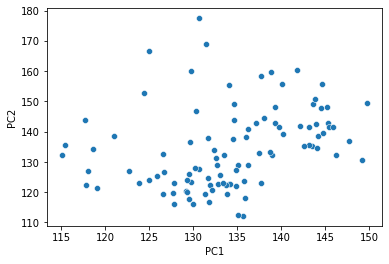

In [ ]:
sns.scatterplot(data = red_df, x = 'PC1', y = 'PC2')